In [1]:
from queue import Queue
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
# from scipy import ndimage
import matplotlib.pyplot as plt
from utils import *
from environment import *
from agent import *
import io
import cv2
import random
from tqdm.notebook import tqdm
from geneticalg import GeneticAlgorithm
import copy
import pickle

In [2]:
# results_string_name = "GA_5RandomAgent_0.1elitism_0.1mutation_40food_20blocks"
results_string_name = "GA_5SwarmAgent_2tile_0.1mutation_20food_20blocks"

pickle_file = open("Pickled/Final/" + results_string_name, "rb")
pickle_dict = pickle.load(pickle_file)
grids = pickle_dict['grids']
fitness_values = pickle_dict['fitness values']
env_params = pickle_dict['env_params']


env_params['epsilon'] = 0

In [3]:
i = 49 # iteration number for grid of interest
n = 0 # number within iteration pool for grid of interest
num_agents = 5 # num agents


Fitness: 0.0


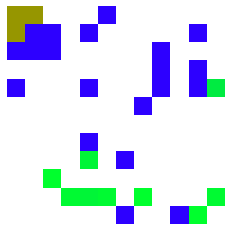

In [4]:
# Visualize a grid of interest
%matplotlib inline

p = grids[i][n]
pp = process_grids((np.zeros_like(p), p, np.zeros_like(p)), env_params)
to_replace = np.where((pp[0] == [0,0,0]).all(axis=2))
pp[0][to_replace] = pp[1][to_replace]
plt.imshow(pp[0].astype('uint8'))
plt.axis('off')
print("Fitness: " + str(fitness_values[i][n]))

In [5]:
# Run simulation on a grid of interest
env = Environment(env_params, grid = grids[i][n])

testAgents = [SwarmAgent(i, env_params, env.spt) for i in range(num_agents)]
# test_agents = [DQNAgent(i, env_params, net_filepath="DQN/target_net.pt") for i in range(5)]
food_collected, env_observations = env.run_episode(testAgents, visualize = True)
print(food_collected)

grid
 3.0 3.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0
 3.0 4.0 4.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0
 4.0 4.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 4.0 0.0
 4.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 4.0 0.0 4.010.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 8.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 7.0 8.0 7.0 0.0 6.0 0.0 0.0 0.0 7.0
 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 6.0 0.0
static
 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0

<IPython.core.display.Javascript object>


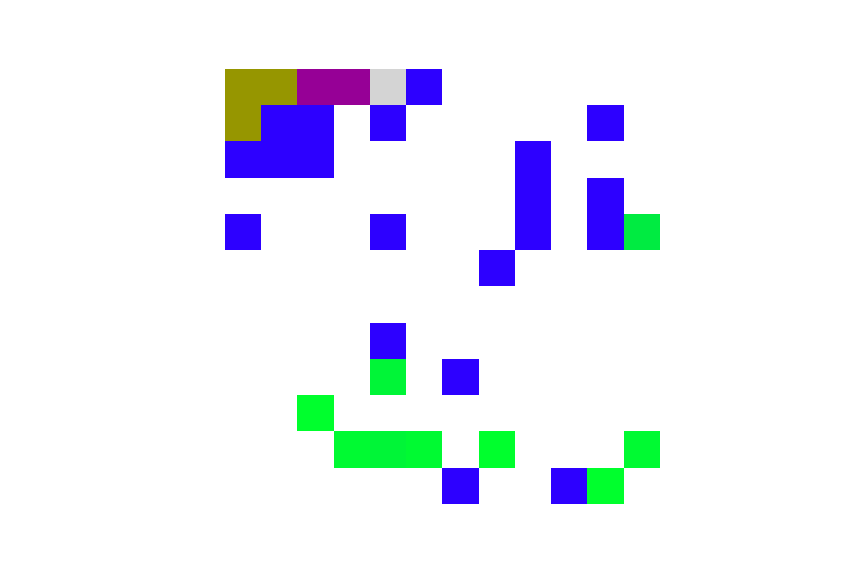

In [7]:
%matplotlib notebook
# View simulation
# may need to rerun a few times to make it work
# https://stackoverflow.com/questions/10429556/animate-quadratic-grid-changes-matshow

# empty_grid = np.zeros_like(env_observations[-1][0])
# empty_obs = (empty_grid, empty_grid, empty_grid)

# for _ in range(20):
#     env_observations.append(empty_obs)

# get frame for display in animation
def get_ani_frame(obs, env_params):
    pg = process_grids(obs, env_params)
    to_replace = np.where((pg[0] == [0,0,0]).all(axis=2))
    pg[0][to_replace] = pg[1][to_replace]
    return pg[0].astype('uint8') 

def update_mat(obs):
    frame = get_ani_frame(obs, env_params)
    mat.set_data(frame)

fig, ax = plt.subplots()
mat = ax.matshow(get_ani_frame(env_observations[0], env_params))
ani = animation.FuncAnimation(fig, update_mat, env_observations, interval=20,
                              save_count=50, blit = True)
plt.axis('off')
plt.show() 

In [13]:
# SAVE GIF
# gif_name = results_string_name + "_iter" + str(i) + "_n" + str(n) + ".gif"

# gif_name = "test_nearest.gif"
    
save_as_gif(env_observations, env_params, gif_name, to_size = (100,100), 
            frame_len = 50, freeze_last_frame_for = 50 * 10, raw_env_obs = True)

Saving as GIF...
Your file test_nearest.gif has been saved!


In [46]:
grids[i][n]

array([[ 3.,  3.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.],
       [ 3.,  4.,  0.,  0.,  0.,  4.,  0.,  4.,  0.,  7.],
       [ 0.,  0.,  0.,  0.,  4.,  4.,  0.,  0.,  4.,  0.],
       [ 0.,  4.,  4.,  4.,  6.,  0.,  0.,  4.,  6.,  0.],
       [ 4.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  4.,  9.,  4.,  7.,  0.,  7.,  0.,  0.,  0.],
       [10.,  0.,  6.,  0.,  0.,  0.,  4.,  0.,  0.,  0.],
       [ 0.,  7.,  0.,  0.,  0.,  0.,  8.,  8.,  7.,  0.],
       [ 0.,  0.,  8.,  6.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  8.,  4.,  0.,  0.,  0.,  0.,  0.,  7.,  0.]])

## Grids with Hive Blockades

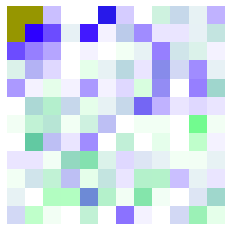

In [7]:
# get array visualizing average of a group of grids
%matplotlib inline
def get_average_grid(grids, env_params):
    empty = np.zeros_like(grids[0])
    processed_grids = np.array([get_ani_frame((empty, g, empty), env_params) for g in grids])
    return np.mean(processed_grids, axis = 0).astype('uint8')
#     return processed_grids
 
    
num_elite = 20
avg_g = get_average_grid(grids[40][:num_elite], env_params)
plt.axis('off')
plt.imshow(avg_g.astype('uint8'))

In [8]:
avg_grids = [get_average_grid(gs[:num_elite], env_params) for gs in grids]

<IPython.core.display.Javascript object>


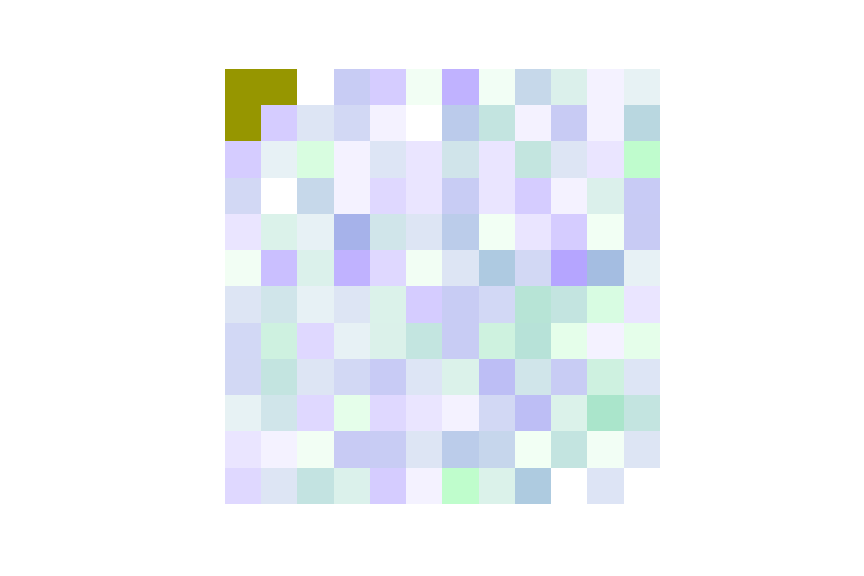

In [11]:
%matplotlib notebook
fig, ax = plt.subplots()

# # freeze on last frame
# for _ in range(10):
#     avg_grids.append(avg_grids[-1])

def update_mat_obs_direct(obs):
    mat.set_data(obs)


mat = ax.matshow(avg_grids[0])
ani = animation.FuncAnimation(fig, update_mat_obs_direct, avg_grids, interval=200,
                              save_count=50, blit = True)
plt.axis('off')
plt.show() 

In [9]:
gif_name = "test_avg_elite_evolution.gif"

save_as_gif(avg_grids, env_params, gif_name, to_size = (120,120), frame_len = 200, freeze_last_frame_for = 10 * 200, raw_env_obs = False)

Saving as GIF...
Your file test_avg_elite_evolution.gif has been saved!


In [ ]:
hive_block_locs = [(0,2), (2,0), (1,1)]
num_elite = 20

# avg food location or dist from hive

# hive block evolution
# plot iters on x axis
# plot 3 curves w pct of elite grids w 0 hive block, 1 hive block, 2 hive blocks
# need 3 lists of num grids w that many hives blocked per iteration

# pct of elite grids per iteration with 0, 1, 2, of the hive blocks listed above blocked off
blocked = [[], [], []]
for iteration in grids:
    elites = iteration[:num_elite]
    iter_blocked = [0,0,0]
    for e in elites:
        
    

In [ ]:
# process grids extra expressive shows food levels + ant levels